**face land mark(랜드마크), alignment(조정)**  
얼굴의 각각 특정 위치를 알아내고 스티커를 붙이자


In [1]:
#구글드라이브 mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 이미지에 왕관 스티커 붙이기

### 이미지 데이터 준비

In [19]:
#경로이동, 이미지 저장
%cd drive/MyDrive/Colab Notebooks/Data-Science/data/img
!pwd

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/Data-Science/data/img'
/content/drive/My Drive/Colab Notebooks/Data-Science/data/img
/content/drive/My Drive/Colab Notebooks/Data-Science/data/img


In [20]:
# 왕관 이미지 저장
!wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
!wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png

--2021-07-20 01:42:51--  https://aiffelstaticprd.blob.core.windows.net/media/original_images/king.png
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511 (13K) [image/png]
Saving to: ‘king.png.1’

king.png.1          100%[===================>]  13.19K  --.-KB/s    in 0.001s  

2021-07-20 01:42:52 (16.3 MB/s) - ‘king.png.1’ saved [13511/13511]

--2021-07-20 01:42:52--  https://aiffelstaticprd.blob.core.windows.net/media/original_images/hero.png
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42963 (42K) [image/png]
Saving t

In [21]:
# opencv, cmake, dlib 설치
!pip install opencv-python
!pip install cmake
!pip install dlib

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


### 얼굴 검출 face detection

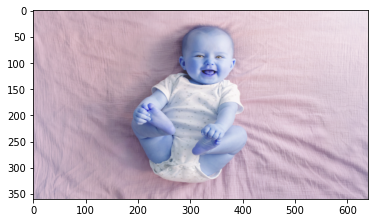

In [31]:
import os
#my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
my_image_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/data/img/baby_face.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize (16:9)
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

> 640x360의 VGA 크기(16:9)로 고정 (4:3일 경우 640*480으로 변경)  

>cv2.imread('img.png', flag)  
- flag: 1(original), 0(Grayscale), -1

>cv2.IMREAD_COLOR : 이미지 파일을 Color로 읽어들임. 투명한 부분은 무시되며, Default값

>cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽어 들임. 실제 이미지 처리시 중간단계로 많이 사용.

>cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함하여 읽어 들임


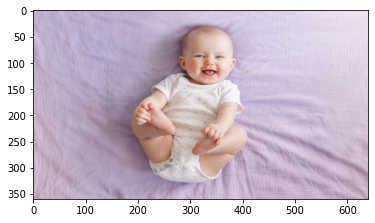

In [32]:
# plt.imshow 이전에 RGB 이미지로 바꾸기
# opencv는 BGR을 사용하므로 RGB로 보정처리
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [33]:
# Object detection 기술을 활용해 얼굴 위치 찾기
# dlib face detector
import dlib
#- detector 선언
detector_hog = dlib.get_frontal_face_detector()  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#bounding box 추출
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


>**`dlib`의 `face detector`** : `HOG`(`Histogram of Oriented Gradient`) feature를 사용해 `SVM`(`Support Vector Machine`)의 sliding window로 얼굴을 찾는다.  
*[딥러닝(Deep Learning)을 사용한 최신 얼굴 인식(Face Recognition) (한국어 번역본)](https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c)  
*`gradient`를 `feature`로 사용하는 이유 :
- 픽셀의 `RGB`값 자체보다는 인접한 픽셀들 사이의 색상 변화율 자체에 오브젝트의 특징이 더욱 정확히 반영될 때가 많기 때문
- 동일한 오브젝트라도 밝을 때와 어두울 때의 픽셀값의 분포는 완전히 다르지만, 밝기가 변하는 (`gradient`)만 고려하면 주변 상황과 무관하게 동일한 표현(representation)을 얻을 수 있음  

>[Image Pyramids](https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html) : 작게 촬영된 이미지를 크게 볼 수 있어 정확한 검출 가능

rectangles[[(295, 56) (384, 146)]]


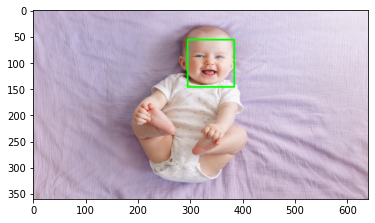

In [34]:
# 찾은 얼굴 화면에 출력하기
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

>[Classes - dlib documentation](http://dlib.net/python/index.html#dlib.rectangles)

### 얼굴 랜드마크 추론 face landmark localization
>`face landmark`는 detection 결과물인 `bounding box`로 crop 한 이미지 이용

>Object keypoint estimation 알고리즘
- 객체 내부의 점을 찾는 기술
- (1) `top-down` : `bounding box`를 찾고 **box 내부**의 `keypoint`를 예측
- (2) `bottom-up` : **이미지 전체**의 `keypoint`를 찾고 `point`관계를 군집화 해 `box` 생성

![image](https://user-images.githubusercontent.com/45934191/126257061-0c634ea6-4282-44d3-934a-6a436666587f.png)

#### model 폴더에 dlib landmark localization 설치

In [36]:
!pwd
%cd ../../model/

/content/drive/My Drive/Colab Notebooks/Data-Science/data/img
/content/drive/My Drive/Colab Notebooks/Data-Science/model


In [37]:
#설치
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-20 02:21:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  25.2MB/s    in 2.4s    

2021-07-20 02:21:17 (25.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [39]:
!pwd

/content/drive/My Drive/Colab Notebooks/Data-Science/model


In [40]:
#압축풀기
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

#### 이미지에 face landmark 출력

68


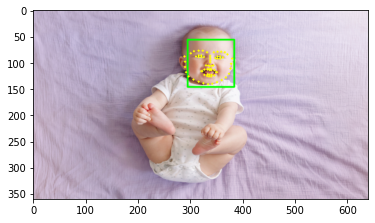

In [48]:
import os
#model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
model_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/model/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path) #landmark 모델 불러오기

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) #landmark_predictor : rgb이미지, dlib.rectangle 입력받아 dlib.full_object_detection return
    
    #points는 dlib.full_object_detection의 객체이므로 parts()함수로 개별 위치에 접근 가능
    #(x,y) 형태로 접근할 수 있도록 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # lisg_points : 68개 랜드마크

# 랜드마크를 영상에 출력하기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


### 스티커 적용
랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 씌우기  
① 코 중심을 기준으로 높이 x 이상에 그리거나  
② 눈썹 위 n 픽셀 위에 스티커를 구현

얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산해야 함
> - 스티커 위치  
$ 
x = x_{nose}\\
y = y_{nose}-\frac{width}{2}
$
>- 스티커 크기  
$ 
width = height = width_{bbox}
$


In [53]:
# 코 중심점 좌표 확인하기 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30. (x_nose, y_nose)
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2 #코 중심을 기준으로 절반
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(338, 99)
(x,y) : (338,54)
(w,h) : (90,90)


In [56]:
sticker_path = '/content/drive/My Drive/Colab Notebooks/Data-Science/data/img/king.png'
img_sticker = cv2.imread(sticker_path)        #스티커 이미지 읽기
img_sticker = cv2.resize(img_sticker, (w,h))  #w,h로 resize
print (img_sticker.shape)

(90, 90, 3)


In [57]:
# 스티커 x, y좌표 조정
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (293,-36)


>**음수** : 원본 이미지의 범위를 벗어남  
=> `opencv` 데이터는 numpy `ndarray` 형태의 데이터를 사용하므로 out of index 에러 예외처리 필요

In [58]:
# 원본 이미지의 범위 벗어난 스티커 부분 제거
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

# y좌표(top) 는 원본 이미지의 경계 값으로 수정
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(54, 90, 3)
(x,y) : (293,0)


In [60]:
# 원본 이미지에 스티커 적용

# 원본 이미지에서 스티커 적용할 위치 crop (293,0) ~ (293+90,0+54)
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 스티커 이미지에서 0 아닌 색이 있는 부분만 사용
# img_sticker가 0일때 sticker_area 사용하고 나머지는 img_sticker
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

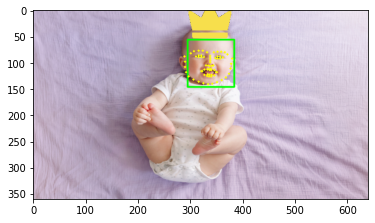

In [61]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

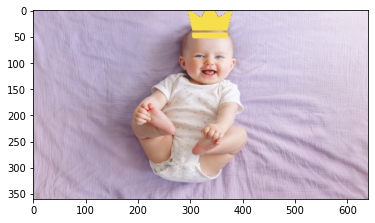

In [62]:
# bounding box와 landmark 제거
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 고양이 수염 스티커 만들기

### 이미지 데이터 준비

In [63]:
!pwd

/root
